In [11]:
#From Optical Tweezer Laser Calculations
# show figures inline in the notebook
# %matplotlib qt
%matplotlib inline               

import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np               # Import Numerical Python
import math
import scipy.constants as const
from IPython.core.display import display, HTML #Import HTML for formatting output

# NOTE: Uncomment following lines ONLY if you are not using installation via pip
# import sys, os
# rootDir = '/path/to/arc/directory' # e.g. '/Users/Username/Desktop/ARC-Alkali-Rydberg-Calculator'
# sys.path.insert(0,rootDir)

from arc import *                 #Import ARC (Alkali Rydberg Calculator)

cs=Caesium() #Cesium has 55 electrons w/ valence 7S 
rb=Rubidium() #Rubidium has 37 electrons w/ valences 6S

In [12]:
#From Optical Tweezer Laser Calculations
#Declare atom variables
cs_gnd=9
rb_gnd=12
E_TO_COULOMB = 1.60217646*10**-19
A0_TO_METER = 5.29*10**-11
TOTAL_STATES = 100
POT = 20000000 #20MHz
POWER = 0.005
NA = .5 #Typical numerical aperture

atom = rb
atom_gnd = rb_gnd
name = "Caesium"
TEMP = 1

Formula for Intensity of a Bottle Beam Trap

$I(r)=P \frac{2^{l+1}r^{2l}}{\pi l! r_0^{2(l+1)}}$exp$[\frac{-2r^{2}}{r_0^2}]$

In [13]:
#Function for Intensity of Bottle Beam Trap
#Returns Intensity as function of power p, position r, beam radius rnaught, and l
def is_intensity(p,r,rnaught,l):
    x = (p*2**(l+1)*r**(2*l))/((math.pi*math.factorial(l)*rnaught**(2*(l+1))))
    x = x**((-2*r**2)/(rnaught**2))
    return x

<function matplotlib.pyplot.show(*args, **kw)>

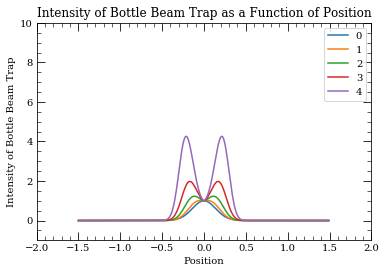

In [32]:
#Calc intensity of Bottle Beam Trap
ls = [0,1,2,3,4]
for l in ls:
    p = 10
    rnaught = .5
    r = -1
    intensity_arr = []
    r_arr = []
    r=-1.5
    while r < 1.5:
        intensity_arr.append(is_intensity(p,r,rnaught,l))
        r_arr.append(r)
        r += 0.01
    plt.plot(np.array(r_arr),np.array(intensity_arr),label=l) 
    
plt.legend()
plt.title('Intensity of Bottle Beam Trap as a Function of Position')    
plt.xlabel('Position')
plt.ylabel('Intensity of Bottle Beam Trap')
plt.xlim(-2,2)
plt.ylim(-1,10)
plt.show